In [1]:
!pip install ultralytics


In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
model = YOLO("E:\\Helmet-Detection-YOLOv8-main\\best.pt")


0: 448x640 1 With Helmet, 4 Without Helmets, 324.4ms
Speed: 11.6ms preprocess, 324.4ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict
1 label saved to runs\detect\predict\labels


(-0.5, 493.5, 328.5, -0.5)

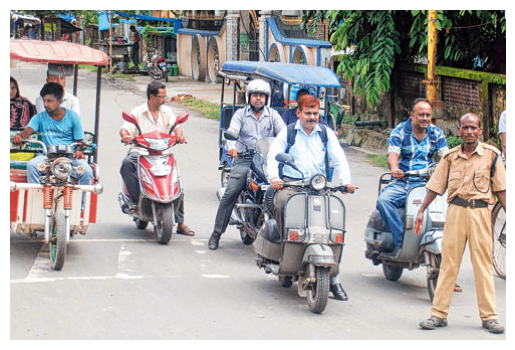

In [4]:
image=cv2.imread(r"E:\Helmet-Detection-YOLOv8-main\Helment_Detection_Yolov5\traffic-helment15.jpg")
x=model.predict(image,save =True,save_txt = True,conf=0.25,iou=0.8)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')



In [5]:
lis = open(r"E:\Helmet-Detection-YOLOv8-main\runs\detect\predict\labels\image0.txt" , "r").readlines()
print(lis)

['0 0.500475 0.252353 0.0631094 0.112873\n', '1 0.82931 0.314125 0.0588601 0.0979602\n', '1 0.92825 0.357639 0.0616829 0.113804\n', '1 0.297591 0.257521 0.0544148 0.0936911\n', '1 0.598394 0.278163 0.0719971 0.143139\n']


In [6]:
with open('labels.txt', 'w+') as file:
  for i in range (len(lis)):
    yolo_cords = lis[i].split(' ')
    class_number, x,y,w,h = list(map(float, yolo_cords))
    if class_number == 1:
      file.write(lis[i])
      print(class_number, x,y,w,h)

1.0 0.82931 0.314125 0.0588601 0.0979602
1.0 0.92825 0.357639 0.0616829 0.113804
1.0 0.297591 0.257521 0.0544148 0.0936911
1.0 0.598394 0.278163 0.0719971 0.143139


number of people without helmet 4


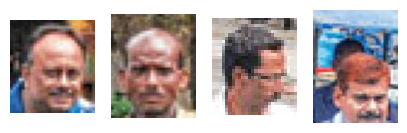

In [7]:
label_file = open('labels.txt', 'r')
labels = label_file.readlines()
count=len(labels)
if len(labels) == 1:
  class_number, x,y,w,h = list(map(float, labels[i].split(' ')))
  h_org, w_org, _ = image.shape
  abs_x = int((x - w/2) * w_org)
  abs_y = int((y - h/2) * h_org)
  abs_w = int(w * w_org)
  abs_h = int(h * h_org)
  cropped_image = image[abs_y : abs_y + abs_h, abs_x : abs_x + abs_w]
  plt.imshow(cropped_image)
else:
  fig, ax = plt.subplots(ncols=len(labels), figsize=(5,5 ))
  for i in range(len(labels)):
    class_number, x,y,w,h = list(map(float, labels[i].split(' ')))
    h_org, w_org, _ = image.shape
    abs_x = int((x - w/2) * w_org)
    abs_y = int((y - h/2) * h_org)
    abs_w = int(w * w_org)
    abs_h = int(h * h_org)
    cropped_image = image[abs_y : abs_y + abs_h, abs_x : abs_x + abs_w]
    #cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
    ax[i].imshow(cropped_image)
    ax[i].axis('off')
print("number of people without helmet",count)